In [ ]:
'''
Built a Fake News Classifier using Nultinomial Naive Bayes Classifer. Collected the Data as True News and Fake News and concated them. Performed Data Preprocessing and used Count Vectorizer.
Performed Classification based on the Title of the News as well as the Text in the news. 
Got an Accuracy Score of 0.9516 when the Title was used and got 0.9358 when the Text of the News was used

'''

## Importing Packages

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [23]:
fdata = pd.read_csv('Fake.csv')
tdata = pd.read_csv('True.csv')

## Data Preprocessing

In [26]:
fdata['Label']=0
tdata['Label']=1

In [27]:
fdata.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [28]:
tdata.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [29]:
fdata.drop(columns=['date'],inplace=True)
tdata.drop(columns=['date'],inplace=True)

In [30]:
data = pd.concat([fdata,tdata],axis=0,ignore_index=True)

In [31]:
data.sample(frac=1)

,title,text,subject,Label
29280,Pentagon to seek budget change to boost Islami...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,politicsNews,1
39843,Split in Temer ruling coalition likely dooms r...,BRASILIA (Reuters) - Brazilian President Miche...,worldnews,1
5506,LISTEN: Dispatch Audio Reveals Cop Who Killed...,"As much as Jeronimo Yanez, the police officer ...",News,0
10429,IS WASHINGTON POST INCITING VIOLENCE Against F...,"This afternoon, The Washington Post wrote an o...",politics,0
222,WATCH: Van Jones Scorches Insane Republican W...,Donald Trump is an extreme narcissist who alwa...,News,0
...,...,...,...,...
28860,"Trump on Twitter (Feb 17) - Tom Price, Boeing,...",The following statements were posted to the ve...,politicsNews,1
7329,Florida Judge Blames Rape Victim For Attendin...,The Ultra Music Festival in Miami is one of th...,News,0
10496,“We are progressive”: Activist Defends $190K P...,Immigration advocate Roberto Hernandez joined ...,politics,0
39230,Kenya opposition supporters urged to boycott t...,NAIROBI (Reuters) - Kenya s opposition coaliti...,worldnews,1


In [32]:
data.sample(frac=1).reset_index(drop=True)

,title,text,subject,Label
0,Syrian army battles Islamic State in al-Mayadi...,BEIRUT (Reuters) - The Syrian army and its all...,worldnews,1
1,British jihadi 'White Widow' killed by U.S. dr...,"LONDON (Reuters) - Sally Jones, a British jiha...",worldnews,1
2,Republican Senator Collins 'leaning against' n...,WASHINGTON (Reuters) - Republican Senator Susa...,politicsNews,1
3,HOW TRUMP RESPONDED WHEN 200 Gulf War Marines ...,The story you ll never see in the mainstream m...,politics,0
4,97-Year-Old Woman Dies After Being Evicted Fr...,"Marie Hatch, a 97-year-old California resident...",News,0
...,...,...,...,...
44893,THIS IS NOT A JOKE! Soros-Linked Group Has Pla...,"The Left has been organizing for decades, and ...",left-news,0
44894,Russian official: not worried about EU's moves...,BERLIN (Reuters) - A senior Russia s foreign m...,worldnews,1
44895,Limousine Liberal Leo DeCaprio Joins Globalist...,Two hypocrite climate change freaks decided to...,left-news,0
44896,FBI investigated over pre-election decisions o...,WASHINGTON (Reuters) - The U.S. Justice Depart...,politicsNews,1


In [33]:
data.replace('[^a-zA-Z]'," ",regex=True,inplace=True)

In [34]:
for i in data.columns:
    try:
        data[f'{i}'] = data[f'{i}'].str.lower()
    except:
        pass

## Model Building

### Using the Text for the model

In [47]:
res = data['text']

In [48]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm

In [49]:
lm = WordNetLemmatizer()

In [55]:
new_data = []

In [56]:
for i in tqdm(res):
    new = i.split()
    new = [lm.lemmatize(word) for word in new if word not in set(stopwords.words('english'))]
    new = " ".join(new)
    new_data.append(new)

100%|██████████| 44898/44898 [1:16:22<00:00,  9.80it/s]


In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
cv = CountVectorizer()

In [59]:
headlines = cv.fit_transform(new_data)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test = train_test_split(headlines,data['Label'],test_size=0.2,random_state=43)

In [62]:
from sklearn.naive_bayes import MultinomialNB

In [63]:
nb = MultinomialNB()

In [64]:
nb.fit(x_train,y_train)

MultinomialNB()

In [66]:
pred = nb.predict(x_test)

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [69]:
cm = confusion_matrix(y_test,pred)

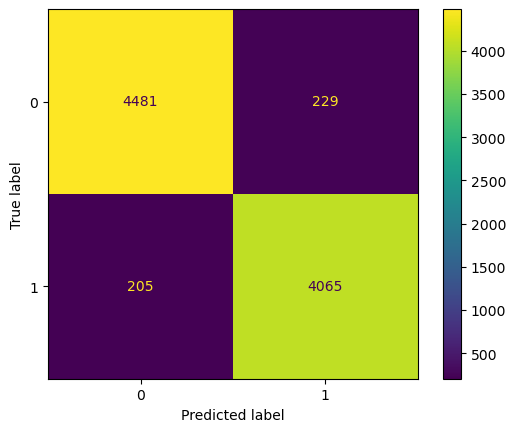

In [70]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [71]:
from sklearn.metrics import accuracy_score

In [73]:
print(accuracy_score(y_true=y_test,y_pred=pred))

0.9516703786191537


### Using the Title for the Model

In [77]:
res2 = data['title']

In [78]:
new_data2 = []

In [79]:
for i in tqdm(res2):
    new2 = i.split()
    new2 = [lm.lemmatize(word) for word in new2 if word not in set(stopwords.words('english'))]
    new2 = " ".join(new2)
    new_data2.append(new2)

100%|██████████| 44898/44898 [06:05<00:00, 122.76it/s]


In [80]:
titles = cv.fit_transform(new_data2)

In [81]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(titles,data['Label'],test_size=0.2,random_state=43)


In [82]:
nb2 = MultinomialNB()

In [83]:
nb2.fit(x_train2,y_train2)

MultinomialNB()

In [84]:
pred2 = nb2.predict(x_test2)

In [85]:
cm2 = confusion_matrix(y_test2,pred2)

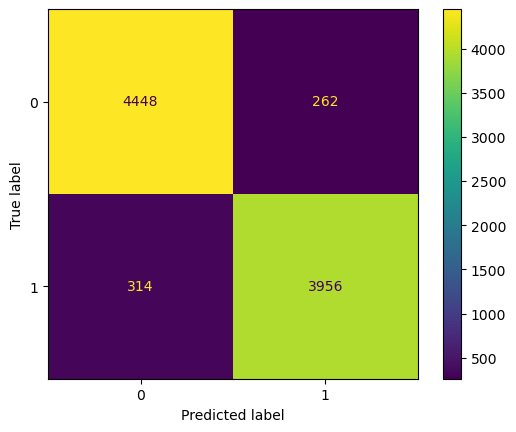

In [86]:
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()

In [87]:
print(accuracy_score(y_true=y_test2,y_pred=pred2))

0.9358574610244988
